# Problem statement:  
The marketing team has prepared 10 different ads, and we have collected a dataset of Click Through Rates of all those ads. Looking at the dataset we have to find, which ad has the most probability of click rate.

# Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [5]:
df = pd.read_csv('/content/Ads_CTR_Optimisation.csv')

# Upper Confidence Bound Algorithm

In [11]:
# Creating variables
N = 1000 # Total number of users to show ads to
d = 10 # number of ads

selected_ads = [] # list of selected ads, will start empty

Ni = [0] * d # number of times ad i was selected upto N iteration
Ri = [0] * d # the sum of rewards of the ad i upto iteration

total_rewards = 0 # total rewards

In [12]:
import math
for n in range(0, N): # iterate through all users
    ad = 0 
    max_upper_bound = 0
    for i in range(0, d): # iterate through all ads
        if Ni[i] == 0:
            upper_bound = 1e500 #if its the first ad set a high value
        else:
            average_reward = Ri[i] / Ni[i] # calculate average reward

            # now calculate confidence interval delta
            conf_interval = math.sqrt( (3/2) * (math.log(n+1) / Ni[i])) 

            upper_bound = average_reward + conf_interval

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    
    selected_ads.append(ad) # append the ad with max_upper_bound to the list
    Ni[ad] += 1 # increase the number of times given ad was selected
    reward = df.values[n,ad] # get the reward from df for the selected ad
    Ri[ad] += reward # add the reward to sum of rewards
    total_rewards += reward # add this reward to total reward

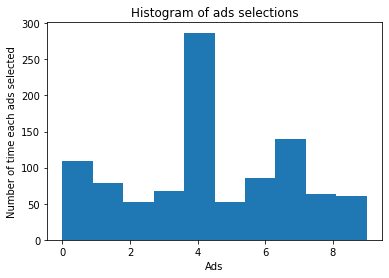

In [13]:
plt.hist(selected_ads)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of time each ads selected')
plt.show(); 